## 1. Импорт данных.

In [885]:
import pandas as pd

data = pd.read_csv('data.csv')
data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


## 2. Определение задачи

y
0    128
1     91
Name: count, dtype: int64


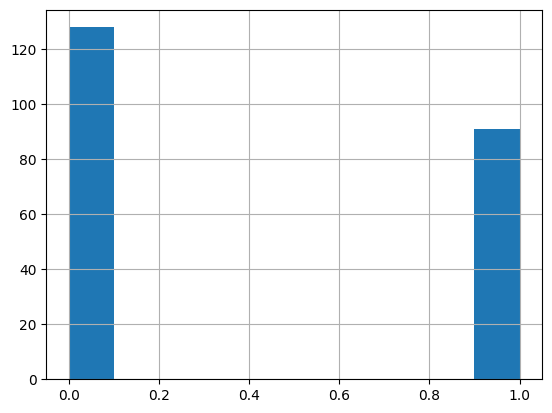

In [886]:
data['y'].hist()
unique_y_count = data['y'].nunique()
frequency = data['y'].value_counts()
print(frequency)

Задача представляет собой задачу бинарной классификации, где выходная переменная принимает значение 0 или 1 в зависимости от того, станет ли студент предпринимателем

## 3. Предобработка данных

In [887]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


data = pd.get_dummies(data, columns=['KeyTraits'], dtype=int)
data = pd.get_dummies(data, columns=['EducationSector'], dtype=int)


y = data['y']
x = data.drop(['y'], axis=1)
x = x.drop(['ReasonsForLack'], axis=1)


data_train, data_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

In [888]:
from sklearn.preprocessing import LabelEncoder

In [889]:
le = LabelEncoder()

data_train['IndividualProject'] = le.fit_transform(data_train['IndividualProject'])
data_test['IndividualProject'] = le.transform(data_test['IndividualProject'])

In [890]:
le = LabelEncoder()

data_train['Gender'] = le.fit_transform(data_train['Gender'])
data_test['Gender'] = le.transform(data_test['Gender'])

In [891]:
le = LabelEncoder()

data_train['City'] = le.fit_transform(data_train['City'])
data_test['City'] = le.transform(data_test['City'])

In [892]:
le = LabelEncoder()

data_train['Influenced'] = le.fit_transform(data_train['Influenced'])
data_test['Influenced'] = le.transform(data_test['Influenced'])

In [893]:
le = LabelEncoder()

data_train['MentalDisorder'] = le.fit_transform(data_train['MentalDisorder'])
data_test['MentalDisorder'] = le.transform(data_test['MentalDisorder'])

In [894]:
data_test.head()

,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,...,KeyTraits_Work Ethic,"EducationSector_Art, Music or Design","EducationSector_Economic Sciences, Business Studies, Commerce and Law",EducationSector_Engineering Sciences,EducationSector_Humanities and Social Sciences,EducationSector_Language and Cultural Studies,EducationSector_Mathematics or Natural Sciences,"EducationSector_Medicine, Health Sciences",EducationSector_Others,"EducationSector_Teaching Degree (e.g., B.Ed)"
163,1,21,1,0,1,2,2,3,3,3,...,0,1,0,0,0,0,0,0,0,0
215,1,19,1,1,0,2,2,2,2,2,...,1,0,0,1,0,0,0,0,0,0
136,0,20,1,1,0,1,2,1,2,3,...,0,0,1,0,0,0,0,0,0,0
194,0,20,1,1,1,4,4,4,5,4,...,1,0,0,1,0,0,0,0,0,0
187,0,21,0,0,1,3,1,2,3,2,...,0,0,0,0,0,0,0,0,1,0


In [895]:
data_train.head()

,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,...,KeyTraits_Work Ethic,"EducationSector_Art, Music or Design","EducationSector_Economic Sciences, Business Studies, Commerce and Law",EducationSector_Engineering Sciences,EducationSector_Humanities and Social Sciences,EducationSector_Language and Cultural Studies,EducationSector_Mathematics or Natural Sciences,"EducationSector_Medicine, Health Sciences",EducationSector_Others,"EducationSector_Teaching Degree (e.g., B.Ed)"
11,1,19,1,1,1,3,3,4,4,5,...,0,0,1,0,0,0,0,0,0,0
69,0,19,1,1,1,2,2,3,3,3,...,0,0,0,1,0,0,0,0,0,0
156,1,19,1,1,1,4,5,5,5,5,...,0,0,0,0,0,0,0,0,1,0
3,1,20,1,1,1,3,3,3,3,4,...,0,0,0,1,0,0,0,0,0,0
13,0,21,1,1,1,4,3,4,4,5,...,0,0,0,1,0,0,0,0,0,0


In [896]:
data_train.shape[1]

27

In [897]:
type(data_train)

pandas.core.frame.DataFrame

# Dataset и DataLoader

In [898]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [899]:
class EnterpreneurialCompetencyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(np.array(x), dtype=torch.float32)
        self.y = torch.tensor(np.array(y), dtype=torch.float32)

    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    

In [900]:
dataset_train = EnterpreneurialCompetencyDataset(data_train, y_train)
dataset_test = EnterpreneurialCompetencyDataset(data_test, y_test)

In [901]:
train_dataloader = DataLoader(dataset_train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(dataset_test, batch_size=64, shuffle=True)

# SGD 


In [902]:
import torch.optim
from torch import nn
import matplotlib.pyplot as plt

In [903]:
device = "cpu"

In [904]:
data_train.shape

(175, 27)

In [905]:
class FirstNeuralNetwork(nn.Module):
    def __init__(self):
        super(FirstNeuralNetwork, self).__init__()
        self.linear = nn.Sequential(nn.Linear(27, 1), nn.Sigmoid())
        

    def forward(self, x):
        return self.linear(x)

In [1002]:
model = FirstNeuralNetwork().to(device)

learning_rate = 0.001
epochs = 50

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [1003]:
test_losses = []
train_losses = []

In [908]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    running_loss = 0.
    for batch, (X, y) in enumerate(dataloader):
        
        pred = model(X)

        loss = loss_fn(pred.squeeze(1), y)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        if batch % 64 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    train_losses.append(running_loss / len(dataloader))

In [909]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)

            test_loss += loss_fn(pred.squeeze(1), y).item()
            
            y_f = (pred.squeeze(1) > 0.5).float()

            correct += (y_f == y).sum().item()

    test_loss /= num_batches
    correct /= size
    
    test_losses.append(test_loss)
    print(
        f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n"
    )

In [910]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.898544  [    0/  175]
Test Error: 
 Accuracy: 47.7%, Avg loss: 1.060225 

Epoch 2
-------------------------------
loss: 0.900403  [    0/  175]
Test Error: 
 Accuracy: 47.7%, Avg loss: 0.948311 

Epoch 3
-------------------------------
loss: 0.737860  [    0/  175]
Test Error: 
 Accuracy: 47.7%, Avg loss: 0.870332 

Epoch 4
-------------------------------
loss: 0.669191  [    0/  175]
Test Error: 
 Accuracy: 47.7%, Avg loss: 0.815432 

Epoch 5
-------------------------------
loss: 0.684424  [    0/  175]
Test Error: 
 Accuracy: 47.7%, Avg loss: 0.781505 

Epoch 6
-------------------------------
loss: 0.703665  [    0/  175]
Test Error: 
 Accuracy: 47.7%, Avg loss: 0.755640 

Epoch 7
-------------------------------
loss: 0.646567  [    0/  175]
Test Error: 
 Accuracy: 47.7%, Avg loss: 0.739981 

Epoch 8
-------------------------------
loss: 0.706237  [    0/  175]
Test Error: 
 Accuracy: 50.0%, Avg loss: 0.734695 

Epoch 9
----------------

Epoch 100

Accuracy: 47.7%, Avg loss: 0.713424 

In [911]:
len(train_losses)
train_losses

[0.8986568848292033,
 0.8120505213737488,
 0.7572043538093567,
 0.7257367571194967,
 0.6981861790021261,
 0.7033796509106954,
 0.6873155434926351,
 0.6784010132153829,
 0.684260090192159,
 0.6796023845672607,
 0.677179753780365,
 0.678672214349111,
 0.6795472304026285,
 0.676943838596344,
 0.6804484923680624,
 0.6747749845186869,
 0.6790634989738464,
 0.6779743830362955,
 0.6818465193112692,
 0.6799357930819193,
 0.6858698527018229,
 0.6825648744901022,
 0.6918975512186686,
 0.6804816722869873,
 0.6787526607513428,
 0.6820974747339884,
 0.6819921135902405,
 0.6761646469434103,
 0.6797729929288229,
 0.6777119437853495,
 0.6771764953931173,
 0.6780119935671488,
 0.6793309251467387,
 0.6837113698323568,
 0.6823641260464987,
 0.6792779167493185,
 0.6859777569770813,
 0.6769808928171793,
 0.6822434862454733,
 0.6811363101005554,
 0.6802011529604594,
 0.6863592068354288,
 0.6875657439231873,
 0.6813803513844808,
 0.682698647181193,
 0.6805186669031779,
 0.6771891514460245,
 0.677403271198272

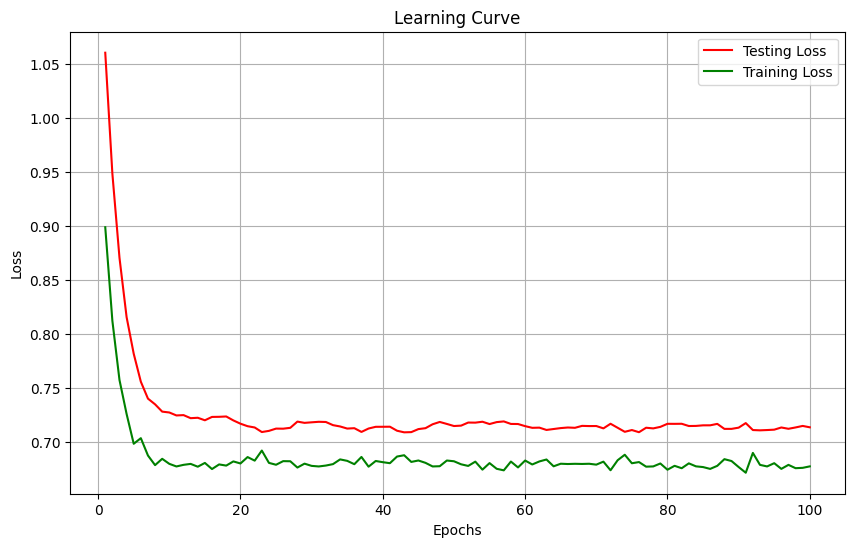

In [912]:
epochs_arr = [i for i in range(1, epochs+1)]
len(train_losses)
plt.figure(figsize=(10, 6))
plt.plot(epochs_arr, test_losses, color='r', label='Testing Loss')
plt.plot(epochs_arr, train_losses, color='g', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()



# Adam и 1 скрытый слой

In [997]:
import torch.optim
from torch import nn
import matplotlib.pyplot as plt

class SecondNeuralNetwork(nn.Module):
    def __init__(self):
        super(SecondNeuralNetwork, self).__init__()
        self.act = nn.Sequential(nn.Linear(27, 2), nn.ReLU(), nn.Linear(2, 1), nn.Sigmoid())
        

    def forward(self, x):
        return self.act(x)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    running_loss = 0.
    for batch, (X, y) in enumerate(dataloader):
        
        pred = model(X)

        loss = loss_fn(pred.squeeze(1), y)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    train_losses.append(running_loss / len(dataloader))


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)

            test_loss += loss_fn(pred.squeeze(1), y).item()
            
            y_f = (pred.squeeze(1) > 0.5).float()

            correct += (y_f == y).sum().item()

    test_loss /= num_batches
    correct /= size
    
    test_losses.append(test_loss)
    print(
        f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n"
    )

dataset_train = EnterpreneurialCompetencyDataset(data_train, y_train)
dataset_test = EnterpreneurialCompetencyDataset(data_test, y_test)
train_dataloader = DataLoader(dataset_train, batch_size=128, shuffle=True)
test_dataloader = DataLoader(dataset_test, batch_size=128, shuffle=True)


model = SecondNeuralNetwork()

learning_rate = 0.001
epochs = 100

loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
test_losses = []
train_losses = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 1.732942  [    0/  175]
loss: 1.736618  [   47/  175]
Test Error: 
 Accuracy: 52.3%, Avg loss: 1.293753 

Epoch 2
-------------------------------
loss: 1.683201  [    0/  175]
loss: 1.737432  [   47/  175]
Test Error: 
 Accuracy: 52.3%, Avg loss: 1.268740 

Epoch 3
-------------------------------
loss: 1.680523  [    0/  175]
loss: 1.613669  [   47/  175]
Test Error: 
 Accuracy: 52.3%, Avg loss: 1.244189 

Epoch 4
-------------------------------
loss: 1.629289  [    0/  175]
loss: 1.622607  [   47/  175]
Test Error: 
 Accuracy: 52.3%, Avg loss: 1.220131 

Epoch 5
-------------------------------
loss: 1.527909  [    0/  175]
loss: 1.768371  [   47/  175]
Test Error: 
 Accuracy: 52.3%, Avg loss: 1.196537 

Epoch 6
-------------------------------
loss: 1.593953  [    0/  175]
loss: 1.465663  [   47/  175]
Test Error: 
 Accuracy: 52.3%, Avg loss: 1.173408 

Epoch 7
-------------------------------
loss: 1.512781  [    0/  175]
loss: 1.561528  [ 

Epoch 100

Accuracy: 52.3%, Avg loss: 0.692663 

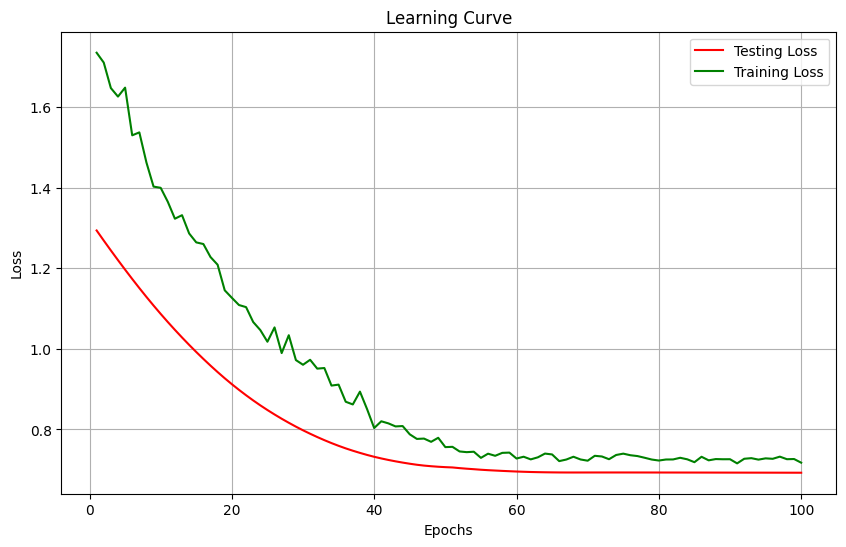

In [998]:
epochs_arr = [i for i in range(1, epochs+1)]
len(train_losses)
plt.figure(figsize=(10, 6))
plt.plot(epochs_arr, test_losses, color='r', label='Testing Loss')
plt.plot(epochs_arr, train_losses, color='g', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# Adam и 3 скрытых слоя

In [1058]:
import torch.optim
from torch import nn
import matplotlib.pyplot as plt

class ThirdNeuralNetwork(nn.Module):
    def __init__(self):
        super(ThirdNeuralNetwork, self).__init__()
        self.act = nn.Sequential(nn.Linear(27, 2), nn.ReLU(), nn.Linear(2, 2), nn.Sigmoid(), nn.Linear(2, 2), nn.ReLU(), nn.Linear(2, 1), nn.Sigmoid())
        

    def forward(self, x):
        return self.act(x)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    running_loss = 0.
    for batch, (X, y) in enumerate(dataloader):
        
        pred = model(X)

        loss = loss_fn(pred.squeeze(1), y)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        loss, current = loss.item(), batch * len(X)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    train_losses.append(running_loss / len(dataloader))


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)

            test_loss += loss_fn(pred.squeeze(1), y).item()
            
            y_f = (pred.squeeze(1) > 0.5).float()

            correct += (y_f == y).sum().item()

    test_loss /= num_batches
    correct /= size
    
    test_losses.append(test_loss)
    print(
        f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n"
    )

dataset_train = EnterpreneurialCompetencyDataset(data_train, y_train)
dataset_test = EnterpreneurialCompetencyDataset(data_test, y_test)
train_dataloader = DataLoader(dataset_train, batch_size=16, shuffle=True)
test_dataloader = DataLoader(dataset_test, batch_size=16, shuffle=True)


model = ThirdNeuralNetwork()

learning_rate = 0.001
epochs = 100

loss_fn = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
test_losses = []
train_losses = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)


Epoch 1
-------------------------------
loss: 1.044818  [    0/  175]
loss: 0.906020  [   16/  175]
loss: 0.904248  [   32/  175]
loss: 1.176688  [   48/  175]
loss: 1.038574  [   64/  175]
loss: 0.968397  [   80/  175]
loss: 0.832537  [   96/  175]
loss: 0.898259  [  112/  175]
loss: 0.963704  [  128/  175]
loss: 0.897240  [  144/  175]
loss: 0.862375  [  150/  175]
Test Error: 
 Accuracy: 52.3%, Avg loss: 0.783250 

Epoch 2
-------------------------------
loss: 1.025768  [    0/  175]
loss: 1.090122  [   16/  175]
loss: 0.759000  [   32/  175]
loss: 1.088609  [   48/  175]
loss: 0.955098  [   64/  175]
loss: 1.017113  [   80/  175]
loss: 0.823110  [   96/  175]
loss: 1.014658  [  112/  175]
loss: 0.950128  [  128/  175]
loss: 0.755621  [  144/  175]
loss: 0.853817  [  150/  175]
Test Error: 
 Accuracy: 52.3%, Avg loss: 0.782621 

Epoch 3
-------------------------------
loss: 0.818274  [    0/  175]
loss: 0.881908  [   16/  175]
loss: 1.006709  [   32/  175]
loss: 0.877189  [   48/  1

Epoch 100

Accuracy: 47.7%, Avg loss: 0.697899 

Done!


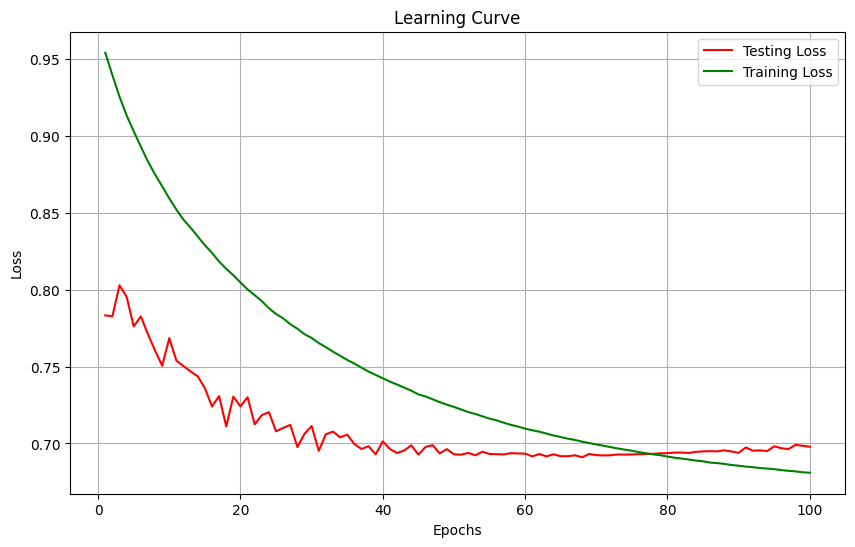

In [1059]:
print("Done!")
epochs_arr = [i for i in range(1, epochs+1)]
len(train_losses)
plt.figure(figsize=(10, 6))
plt.plot(epochs_arr, test_losses, color='r', label='Testing Loss')
plt.plot(epochs_arr, train_losses, color='g', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()